In [11]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iexfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [42]:
import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
%matplotlib inline

In [43]:
#from alpaca.stocks import get_historical_data
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

assets = api.list_assets()

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [44]:
print(assets[0])

Asset({   'class': 'us_equity',
    'easy_to_borrow': False,
    'exchange': 'AMEX',
    'id': 'f9dd6f91-72d7-42a5-8b7e-243eb5d44f07',
    'marginable': True,
    'name': 'Envela Corporation',
    'shortable': False,
    'status': 'active',
    'symbol': 'ELA',
    'tradable': True})


In [45]:
# Subset your tickers, then pull returns data:
# Set the ticker
ticker = ["SPY","AGG"]
# Set timeframe to '1D'
timeframe = '1D'
# Set start and end datetimes of 1 year, between now and 365 days ago.
end_date = datetime.now()
start_date = end_date + timedelta(-365)
# Get 1 year's worth of historical data for AGG and SPY
historical_df = api.get_barset(
    ticker,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df
historical_df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
historical_df.head()

,AGG,SPY
,close,close
time,,
2019-11-22 00:00:00-05:00,112.850,311.00
2019-11-25 00:00:00-05:00,112.980,313.35
2019-11-26 00:00:00-05:00,113.120,314.02
2019-11-27 00:00:00-05:00,112.995,315.46
2019-11-29 00:00:00-05:00,112.925,314.27


# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 500 iterations and generate at least 30 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 30 years

In [46]:
# Calculate the daily roi for the stocks
# YOUR CODE HERE

daily_returns_historical = historical_df.pct_change()
daily_returns_historical.head()


,AGG,SPY
,close,close
time,,
2019-11-22 00:00:00-05:00,NaN,NaN
2019-11-25 00:00:00-05:00,0.001152,0.007556
2019-11-26 00:00:00-05:00,0.001239,0.002138
2019-11-27 00:00:00-05:00,-0.001105,0.004586
2019-11-29 00:00:00-05:00,-0.000619,-0.003772


In [60]:
# Calculate volatility
# YOUR CODE HERE
std_dev_daily_return = daily_returns_historical.std()
std_dev_daily_return





AGG  close    0.008495
SPY  close    0.030316
dtype: float64

In [61]:
avg_daily_return = daily_returns_historical.mean()
avg_daily_return

AGG  close    0.000420
SPY  close   -0.000361
dtype: float64

In [62]:
# Save the last day's closing price
# YOUR CODE HERE
SPY_last_price = historical_df['SPY']['close'][-1]
AGG_last_price = historical_df['AGG']['close'][-1]
SPY_last_price
AGG_last_price

117.22

In [63]:
# Setup the Monte Carlo Parameters
number_simulations = 50
number_records = 252 * 30


In [66]:
# Run the Monte Carlo Simulation
for x in range(number_simulations):
    print(f"Running Simulation {x}...")
    
    SPY_prices = [SPY_last_price]
    AGG_prices = [AGG_last_price]
    # YOUR CODE HERE
    

    for n in range(number_records):
        
        simulated_prices = simulated_SPY_prices[-1] * (1 + np.random.normal(avg_daily_return['SPY']['close'], std_dev_daily_return['SPY']['close']))
        SPY_prices.append(simulated_prices)
    
        simulated_prices = simulated_AGG_prices[-1] * (1 + np.random.normal(avg_daily_return['AGG']['close'], std_dev_daily_return['AGG']['close']))
        AGG_prices.append(simulated_prices)
    
   # Create a DataFrame of the simulated prices  
    portfolio = pd.DataFrame({
        "SPY Simulated Prices": SPY_prices,
        "AGG Simulated Prices": AGG_prices
    })
    
    
    portfolio_returns=portfolio.pct_change()
    
    

Running Simulation 0...
Running Simulation 1...
Running Simulation 2...
Running Simulation 3...
Running Simulation 4...
Running Simulation 5...
Running Simulation 6...
Running Simulation 7...
Running Simulation 8...
Running Simulation 9...
Running Simulation 10...
Running Simulation 11...
Running Simulation 12...
Running Simulation 13...
Running Simulation 14...
Running Simulation 15...
Running Simulation 16...
Running Simulation 17...
Running Simulation 18...
Running Simulation 19...
Running Simulation 20...
Running Simulation 21...
Running Simulation 22...
Running Simulation 23...
Running Simulation 24...
Running Simulation 25...
Running Simulation 26...
Running Simulation 27...
Running Simulation 28...
Running Simulation 29...
Running Simulation 30...
Running Simulation 31...
Running Simulation 32...
Running Simulation 33...
Running Simulation 34...
Running Simulation 35...
Running Simulation 36...
Running Simulation 37...
Running Simulation 38...
Running Simulation 39...
Running Si

In [67]:
# Set the Portfolio Weights (Assume a 60/40 stocks to bonds ratio)
stocks_weight = 0.60
bonds_weight = 0.40

In [68]:
# Calculate the weighted portfolio return: 
portfolio_returns = stocks_weight * portfolio_returns['SPY Simulated Prices'] + bonds_weight * portfolio_returns['AGG Simulated Prices']


In [70]:
 # Calculate the normalized, cumulative return series
monte_carlo[x] = (1 + portfolio_returns.fillna(0)).cumprod()

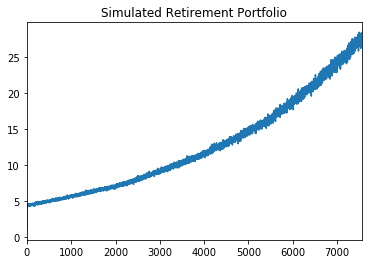

In [71]:
# Visualize the Simulation
# YOUR CODE HERE
monte_carlo.plot(legend=None, title = "Simulated Retirement Portfolio")

In [74]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
# YOUR CODE HERE
ending_returns = monte_carlo.iloc[-1, :]


In [75]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
# YOUR CODE HERE
ending_returns = monte_carlo.tail(1).T
ending_returns.head()


,7560
49,27.550871


In [76]:
monte_carlo_t = monte_carlo.transpose()
monte_carlo_t.head()

,0,1,2,3,4,5,6,7,8,9,...,7551,7552,7553,7554,7555,7556,7557,7558,7559,7560
49,1.0,4.253972,4.48448,4.449773,4.379822,4.441206,4.260634,4.418877,4.5464,4.309053,...,27.924848,27.859356,27.222555,27.697913,27.334126,28.457609,27.015829,28.099327,28.020913,27.550871


In [79]:
# Display the 90% confidence interval for the ending returns
# YOUR CODE HERE
confidence_interval = monte_carlo_t['ending_returns'].quantile(q=[0.900])
confidence_interval

ValueError: Must pass DataFrame with boolean values only

In [82]:
plt.figure()
monte_carlo_t['ending_returns'].plot(kind='hist', density=True, bins=[0,1,2,3,4,5], title="95% Confidence 

SyntaxError: EOL while scanning string literal (<ipython-input-82-9d0ad7992e39>, line 2)

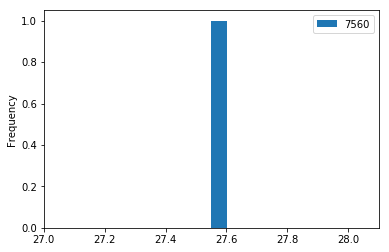

In [88]:
# Visualize the distribution of the ending returns
# YOUR CODE HERE
ending_returns.plot(kind='hist', bins=20)

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [84]:
# YOUR CODE HERE
initial_investment = 20000
cumulative_returns = initial_investment * ending_returns
cumulative_returns.head()

,7560
49,551017.414443


### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [85]:
# YOUR CODE HERE
confidence_interval = ending_returns.quantile(q=[0.100, 0.900])
confidence_interval
confidence_interval = ending_returns.quantile(q=[0.500, 0.500])
confidence_interval
confidence_interval = ending_returns.quantile(q=[0.900, 0.100])
confidence_interval

,7560
0.9,27.550871
0.1,27.550871


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [ ]:
# YOUR CODE HERE

### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [87]:
# YOUR CODE HERE
initial_investment = 30000
cumulative_returns = initial_investment * ending_returns
cumulative_returns.head()

,7560
49,826526.121664


### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# YOUR CODE HERE